In [10]:
idx=1
strt='1990-10-1'
nd='2012-09-30'

In [19]:
from hydro import objective_fxns as obfx

In [11]:
def parse_date(df):
    return '%s-%s-%s'%(int(df.year),int(df.month),int(df.day))

def read_file(fl):
    dat = pd.read_table(fl,sep=' ')
    dat['datetime'] = dat.apply(parse_date,axis=1)
    dat.index = pd.DatetimeIndex(dat.datetime)
    dat['ET'] = dat.trans + dat.evap
    
    return dat

In [21]:
obs = pd.read_pickle('/projects/RHESSys/data/niwot_new.pcl')[strt:nd]

In [22]:
fl = '/RHESSys/Como/out/niwotsnotel_test_%s_basin.daily'%(idx)

In [23]:
dat = (read_file(fl))[strt:nd]

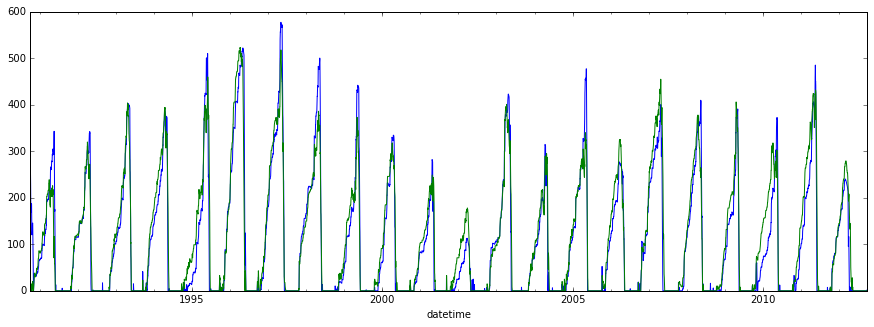

In [24]:
dat.snowpack.plot(figsize=(15,5))
obs.SWE.plot()

In [25]:
obfx.nashsut(obs.SWE.as_matrix(),dat.snowpack.as_matrix())

0.90641018931299167